#Croix de Saint André

L'émission d'ondes internes par un obstacle oscillant à la pulsation $\omega_0$ est modélisée par l'équation : 
$${\partial^2 \over \partial t^2}\,\left({\partial^2  \over \partial x^2} + {\partial^2  \over \partial z^2} \right) u + N^2 \, {\partial^2 u \over \partial x^2} u = f(x,z) \, e^{-i\,\omega_0\,t}$$
où $N_b^2 = {g\over \Theta_r} \, {d \overline\Theta \over dz}$ est la fréquence de Brunt-Vaisalla et $f(x,z)$ la forme de l'obstacle. 
On montre ([1]) que la solution de cette équation est  $u(x,z,t) = U(x,z)\, e^{-i\,\omega_0\,t}$ avec 
$$ U(x,z) = \underset{\epsilon \to 0
}{\lim} \int \!\!\!\int_{\mathbb R^2} {\widehat f(k_x, k_z) \over -(\omega_0 + i\, \epsilon)^2 +\Omega^2(k_x,k_z)} \, dk_x\, dk_z\;,$$
où $\widehat f$ est la transformée de Fourier de $f$ définie par la relation 
$$ f(x,z) = \int \!\!\!\int_{\mathbb R^2} \widehat f(k_x, k_z)   e^{-i\,(k_x\,x + k_z\, z)}\, dk_x\, dk_z\;,$$
et $\Omega(k_x,k_z) = N_b\, k_x/\sqrt{k_x^2 + k_z^2}$ la relation de dispersion des ondes internes. La solution physique est obtenue en prenant la partie réelle de $u(x,z,t)$.
On modélise ici l'obstacle pour une gaussienne :
$$ f(x,z) = \exp\left(- {x^2 + z^2 \over 2\, \sigma^2}\right)\;.$$
La solution physique est alors obtenue en prenant la partie réelle de $U$.

[1] O. Thual, Des ondes et des fluides, Cépaduès-Éditions 2005, http://thual.perso.enseeiht.fr/otapm/odf-emiobs/index.htm


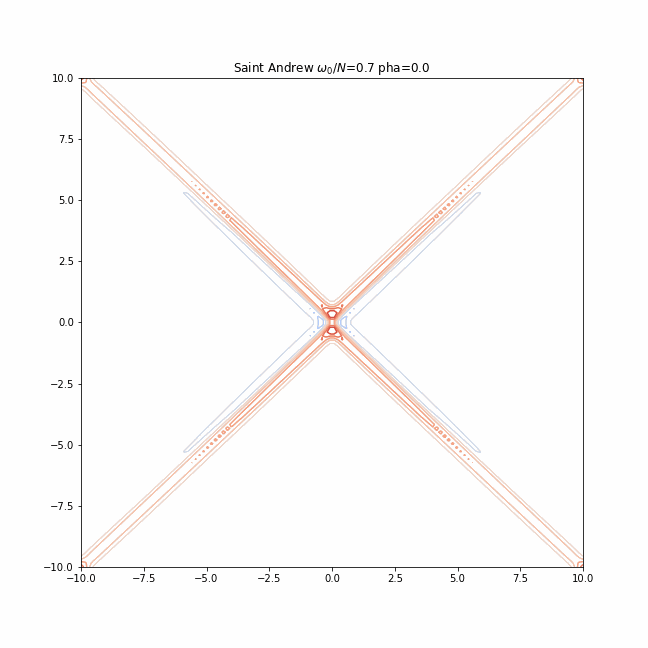

Exécutez cette première partie du code pour définir les fonctions ! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

# Sous programmes 
def zfi(x,le=3):
    miss=le-len(str(x))
    a='0'*miss+str(x)
    return a

def threecon(X,Z,F,KX,KZ,FH,titre):
    FHR=np.real(FH); FHI=np.imag(FH)
    fig = plt.figure(figsize=[10,10])
    # F espace physique
    plt.subplot(1,3,1)
    plt.contour(X,Z,np.real(F))
    # FHR espace spectral
    plt.subplot(1,3,2)
    plt.contour(KX,KZ,FHR)
    # FHI espace spectral
    plt.subplot(1,3,3)
    plt.contour(KX,KZ,FHI)
    plt.savefig(titre+"contour.pdf")
    plt.show()
    
    
def three3d(X,Z,F,KX,KZ,FH,titre):
    FHR=np.real(FH); FHI=np.imag(FH)
    fig = plt.figure(figsize=[10,10])
    # F espace physique
    ax3d = fig.add_subplot(1, 3, 1, projection='3d')
    ax3d.plot_surface(X,Z,np.real(F))
    # FHR espace spectral
    ax3d = fig.add_subplot(1, 3, 2, projection='3d')
    ax3d.plot_surface(KX, KZ,FHR,cmap=cm.coolwarm)
    # FHI espace spectral
    ax3d = fig.add_subplot(1, 3, 3, projection='3d')
    ax3d.plot_surface(KX,KZ,FHI,cmap=cm.coolwarm)
    plt.savefig(titre+"3d.pdf")
    plt.show()
       
    
def animate(i):
    t=i*dt; pha=i/Nt;
    pha=round(t/T,2)
    Ut=U*np.exp(-1j*om0*t);
    UR=np.real(Ut)
    print("pha=",pha)
    ax.clear()
    plt.title(titre+r' $\omega_0/N$='+zfi(om0sNb,2)+" pha="+zfi(pha,2))
    ax.set_title(titre+r' $\omega_0/N$='+zfi(om0sNb,2)+" pha="+zfi(pha,2))
    ax.contour(X,Z,UR,levels=lev,cmap=cm.coolwarm)
    plt.contour(X,Z,UR,levels=lev,cmap=cm.coolwarm)
    plt.show()

# Classes
class croix:
    def __init__(self):
        self.om0=1
        self.sig=L/10
        self.eps=.001

    def Fcroix(self):
        sig=self.sig;
        F=np.exp(-(X**2+Z**2)/(2*sig**2))
        return F    
    
    def Dcroix(self):
        om0=self.om0; eps=self.eps
        D=-(om0+1j*eps)**2+Nb2*KX**2/K2
        return D
   

Les paramètres suivants de la simulation peuvent être modifiés : 

* om0sNb : ${\omega_0\over N_b}$, émission d'ondes si inférieur à 1
* eps : dissipation
* sig : $\sigma$, taille de l'obstace gaussien
* Nb : $N_b$, Fréquence de Brunt Vaissala
* Nh : $N/2$, la moitié du nombre de points de grille

Exécutez le programme ci-dessous et placez-vous en bas de la page pour voir l'animation !

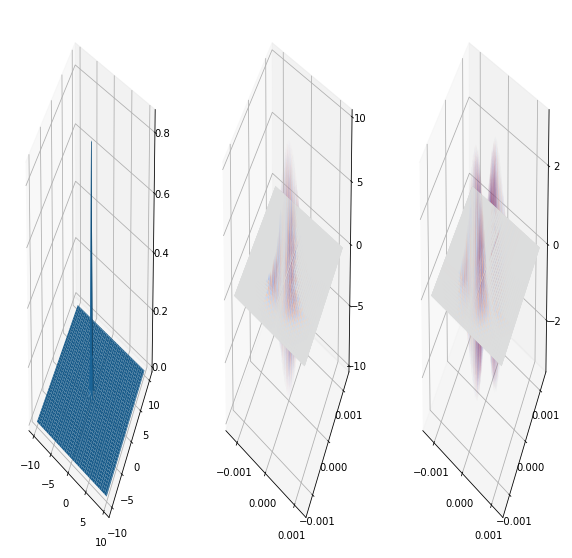

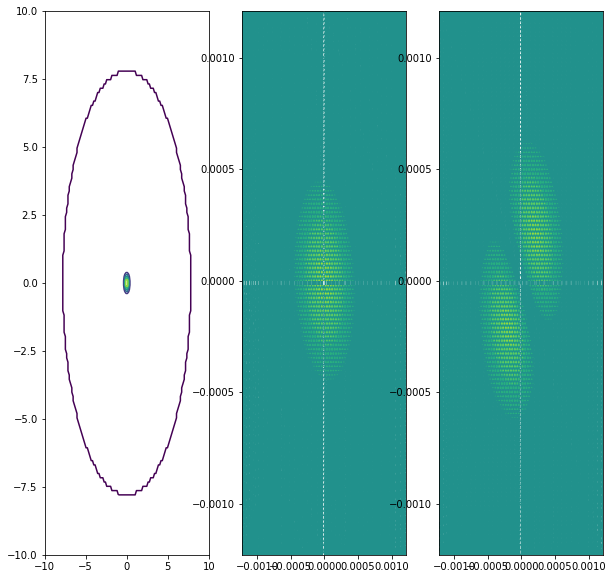

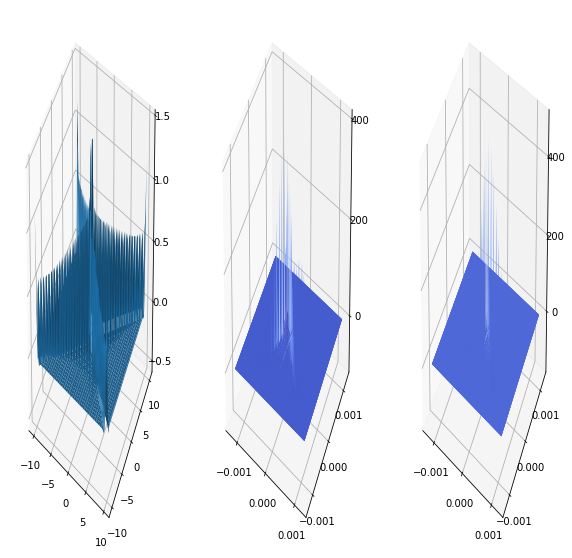

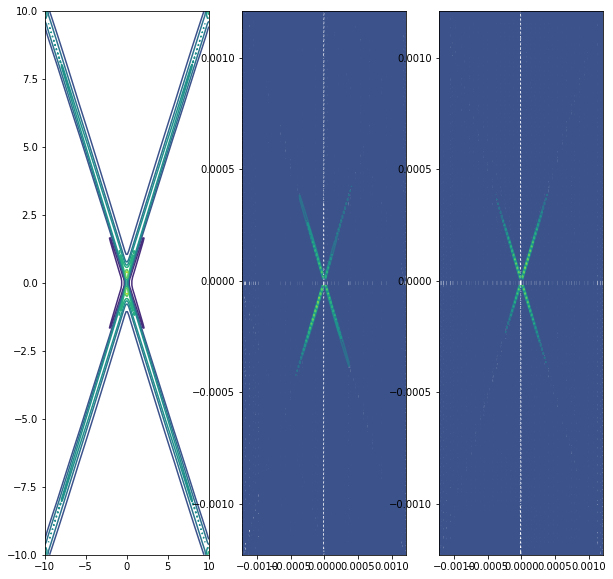

pha= 0.0


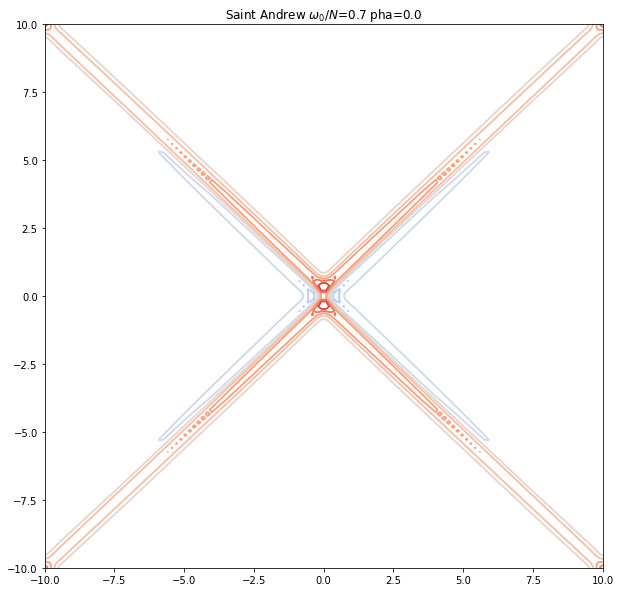

pha= 0.0


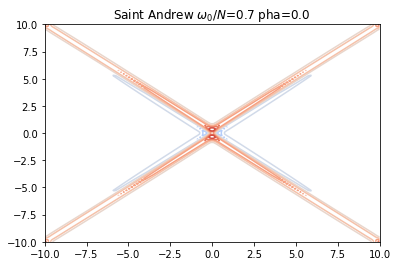

pha= 0.1


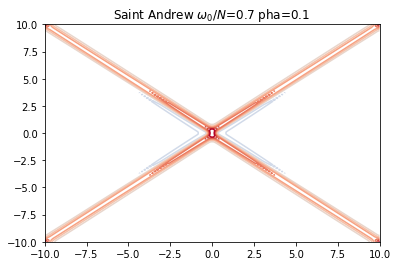

pha= 0.2


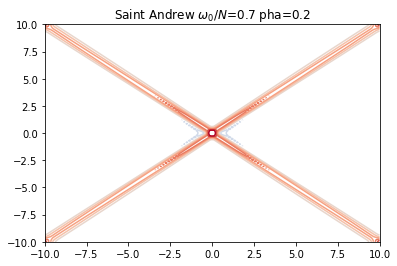

pha= 0.3


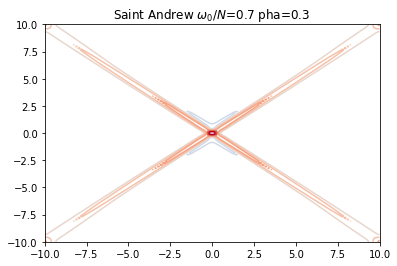

pha= 0.4


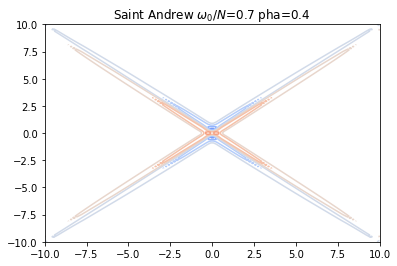

pha= 0.5


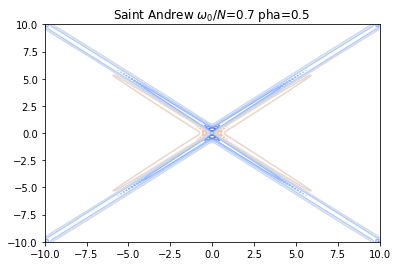

pha= 0.6


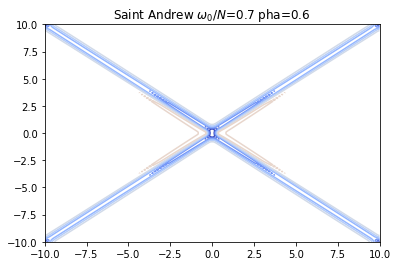

pha= 0.7


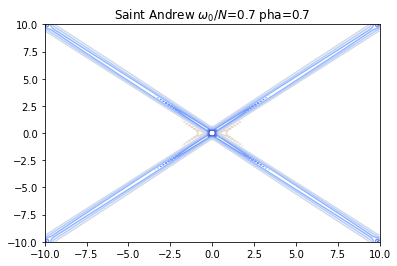

pha= 0.8


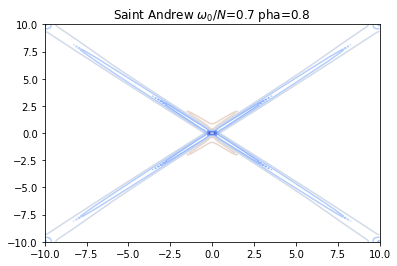

pha= 0.9


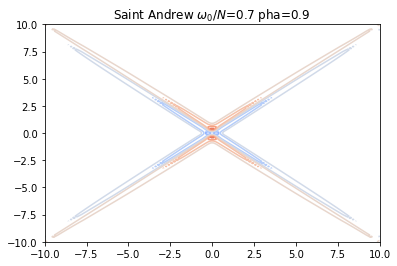

done


In [2]:
######################################
# Main Program 
# parametres
Nh=64; Mh=Nh; N=2*Nh; M=2*Mh; L=10;

C1=croix(); 
Nb=1; om0sNb=.7; om0=om0sNb*Nb
C1.om0=om0; C1.eps=.01; C1.sig=L/50
titre="Saint Andrew"

# coordonnees
x=np.linspace(-L,L,N); z=np.linspace(-L,L,M)
X, Z = np.meshgrid(x,z)

# vecteurs d'ondes
k0=2*np.pi/(2*L);
kx=np.fft.fftfreq(N,d=N/k0)
kz=np.fft.fftfreq(M,d=M/k0)
KX,KZ=np.meshgrid(kx,kz)

# Pour relation de dispersion
Nb2=Nb**2; K2=np.maximum(1e-13,KX**2+KZ**2)


## Forcage F espace physique
F=C1.Fcroix(); D=C1.Dcroix()

FH=np.fft.fft2(F); 
## Figures 3d et contour
if True:
    three3d(X,Z,F,KX,KZ,FH,"F")
    threecon(X,Z,F,KX,KZ,FH,"F")

# ondes emises
UH=FH/D
UH[0,0]=0;
U=np.fft.ifft2(UH)

 
## Figures 3d et contour
if True:
    three3d(X,Z,U,KX,KZ,UH,"U")
    threecon(X,Z,U,KX,KZ,UH,"U")

T=2*np.pi/om0; Nt=10; dt=T/Nt

Umax=np.max(np.real(U))
lev=np.linspace(-Umax,Umax,12)
fig, ax = plt.subplots(figsize=(10,10))

pha=.5
plt.title(r'$\omega_0/N$='+zfi(om0sNb,2)+" pha="+zfi(pha,2))
ani=animation.FuncAnimation(fig,animate,Nt,interval=500)
ani.save(titre+'.gif', writer='pillow')
plt.show()
print("done")